In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random

In [3]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [4]:
response = requests.get(url)
response.status_code 

200

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2022</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2022. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2022" property="og:title"><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2022 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="https://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="https://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/><meta content="100000239962942" property="fb:admins"/><meta content="178831188827052" property="fb:app_id"/><link href="/favicon.png" rel="shortcut

In [7]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite


In [8]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p

In [9]:
title_artists = soup.select("p.title-artist")
print(title_artists)

[<p class="title-artist"><cite class="title">Unholy</cite><em class="artist">Sam Smith &amp; Kim Petras</em></p>, <p class="title-artist"><cite class="title">Eagle (feat. KB)</cite><em class="artist">Transformation Worship</em></p>, <p class="title-artist"><cite class="title">Everywhere</cite><em class="artist">Fleetwood Mac</em></p>, <p class="title-artist"><cite class="title">I'm Good (Blue)</cite><em class="artist">David Guetta &amp; Bebe Rexha</em></p>, <p class="title-artist"><cite class="title">wait in the truck</cite><em class="artist">HARDY &amp; Lainey Wilson</em></p>, <p class="title-artist"><cite class="title">A Thousand Years</cite><em class="artist">Christina Perri</em></p>, <p class="title-artist"><cite class="title">Thank God</cite><em class="artist">Kane Brown &amp; Katelyn Brown</em></p>, <p class="title-artist"><cite class="title">Son Of A Sinner</cite><em class="artist">Jelly Roll</em></p>, <p class="title-artist"><cite class="title">You Proof</cite><em class="artist

In [10]:
for i in title_artists:
    print(i.select(".title")[0].get_text())
    print(i.select(".artist")[0].get_text())


Unholy
Sam Smith & Kim Petras
Eagle (feat. KB)
Transformation Worship
Everywhere
Fleetwood Mac
I'm Good (Blue)
David Guetta & Bebe Rexha
wait in the truck
HARDY & Lainey Wilson
A Thousand Years
Christina Perri
Thank God
Kane Brown & Katelyn Brown
Son Of A Sinner
Jelly Roll
You Proof
Morgan Wallen
I Ain't Worried
OneRepublic
CUFF IT
Beyoncé
Unstoppable
Sia
Bedroom Singer
J.Fla
Left and Right
Charlie Puth & Jung Kook
Wasted On You
Morgan Wallen
She Had Me At Heads Carolina
Cole Swindell
TRUCK BED
HARDY
As It Was
Harry Styles
here lies country music
HARDY
Fall In Love
Bailey Zimmerman
The Kind of Love We Make
Luke Combs
the mockingbird & THE CROW
HARDY
Under the Influence
Chris Brown
Shallow
Lady Gaga & Bradley Cooper
Lose Yourself
Eminem
Celestial
Ed Sheeran
Life Is a Highway
Rascal Flatts
Shivers
Ed Sheeran
Sunroof
Nicky Youre & Dazy
Super Freaky Girl
Nicki Minaj
High Heels
Flo Rida & Walker Hayes
Love Me Like You Do
Ellie Goulding
Victoria’s Secret
Jax
Hold Me Closer
Elton John & Britn

In [11]:
#initialize empty lists
song_title = []
singers = []




num_iter = len(soup.select("p.title-artist"))

song_list = soup.select(".title")
singers_list = soup.select(".artist")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    song_title.append(song_list[i].get_text())
    singers.append(singers_list[i].get_text())
    

print(song_title)
print(singers)



['Unholy', 'Eagle (feat. KB)', 'Everywhere', "I'm Good (Blue)", 'wait in the truck', 'A Thousand Years', 'Thank God', 'Son Of A Sinner', 'You Proof', "I Ain't Worried", 'CUFF IT', 'Unstoppable', 'Bedroom Singer', 'Left and Right', 'Wasted On You', 'She Had Me At Heads Carolina', 'TRUCK BED', 'As It Was', 'here lies country music', 'Fall In Love', 'The Kind of Love We Make', 'the mockingbird & THE CROW', 'Under the Influence', 'Shallow', 'Lose Yourself', 'Celestial', 'Life Is a Highway', 'Shivers', 'Sunroof', 'Super Freaky Girl', 'High Heels', 'Love Me Like You Do', 'Victoria’s Secret', 'Hold Me Closer', 'I Like You (A Happier Song) [feat. Doja Cat]', 'About Damn Time', 'Running Up That Hill (A Deal with God)', 'Numb', '2 Be Loved (Am I Ready)', 'Earned It', 'You, Me, And Whiskey', "You'll Be In My Heart", 'Rock and a Hard Place', 'Soul', 'Vegas (From the Original Motion Picture Soundtrack ELVIS)', "STAR WALKIN' (League of Legends Worlds Anthem)", 'It Will Rain', 'Don’t Come Lookin’', '

In [12]:
songs = pd.DataFrame({"song_title":song_title,
                       "singers":singers,
                       
                      })

In [13]:
songs.tail(60)

,song_title,singers
40,"You, Me, And Whiskey",Justin Moore & Priscilla Block
41,You'll Be In My Heart,Phil Collins
42,Rock and a Hard Place,Bailey Zimmerman
43,Soul,Lee Brice
44,Vegas (From the Original Motion Picture Soundt...,Doja Cat
45,STAR WALKIN' (League of Legends Worlds Anthem),Lil Nas X
46,It Will Rain,Bruno Mars
47,Don’t Come Lookin’,Jackson Dean
48,Next Thing You Know,Jordan Davis
49,Always Remember Us This Way,Lady Gaga


In [14]:
print(len(songs))

100


In [15]:
print(random.randint(0,100))

19


In [16]:
def song_recommender():
    a = input("Enter your favorite song: ")
    if a.lower() in songs['song_title'].str.lower().values:
        ran_num = random.choice(songs['song_title'])
        print('Here you go ... We recommend this song for you \n ENJOY listening to the song:',ran_num)
    else:
        print("Sorry, your song is not on the list and we don't have recommendations")
        
        repeat=input("Do you want to try another song? y/n")
        if repeat == 'y':
            song_recommender()
        else:
            print("Thank you for using our song recommender!")


In [17]:
song_recommender()

Enter your favorite song: djgdj
Sorry, your song is not on the list and we don't have recommendations
Do you want to try another song? y/nn
Thank you for using our song recommender!


In [18]:
url1 = "https://www.billboard.com/charts/hot-100/"

In [19]:
response = requests.get(url1)
response.status_code 

200

In [20]:
soup1 = BeautifulSoup(response.content, "html.parser")

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
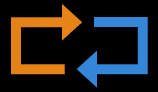

In [21]:
soup1

In [22]:

#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div.o-chart-results-list-row-container.u-box-shadow-header-main.lrv-u-position-relative.u-z-index-middle-bottom > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max

In [49]:
song_singers = soup1.select("ul.lrv-a-unstyle-list > li.o-chart-results-list__item.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.lrv-u-border-color-grey-light.lrv-u-padding-l-050")
print(song_singers)

[<li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-050 lrv-u-padding-l-1@mobile-max">
<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">

	
	
		
					As It Was		
	
</h3>
<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
	
	Harry Styles
</span>
</li>, <li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lr

In [56]:
titles = []
singers = []
for i in song_singers:
    titles.append(i.select("h3#title-of-a-story")[0].get_text().strip()) # #- for accessing ID attribute.
    singers.append(i.select("span.c-label")[0].get_text().strip())
    
songs1= pd.DataFrame({'title': titles, 'singers': singers})
print(songs1.shape)
display(df.head(100))

(99, 2)


,title,singers
0,As It Was,Harry Styles
1,Unholy,Sam Smith & Kim Petras
2,I Like You (A Happier Song),Post Malone Featuring Doja Cat
3,Sunroof,Nicky Youre & dazy
4,Super Freaky Girl,Nicki Minaj
...,...,...
94,Blow,Moneybagg Yo
95,World's Smallest Violin,AJR
96,Oklahoma Smoke Show,Zach Bryan
97,No Se Va,Grupo Frontera


In [57]:
df = pd.concat([songs, songs1])

In [59]:
df.shape

(199, 3)